In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


C:\Users\Harshada\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
titanic = sns.load_dataset("titanic")

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.to_csv("train.csv",index = False)
titanic.shape


(891, 15)

In [5]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
titanic.columns


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
titanic.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())


In [10]:
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode().iloc[0])
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode().iloc[0])
     

In [11]:
titanic.isnull().sum()


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [12]:
titanic.drop(columns=['deck'],inplace = True)
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [13]:
titanic['age'] = titanic['age'].astype(int)
titanic.loc[titanic['sex'] == 'male', 'sex'] = 'M'
titanic.loc[titanic['sex'] == 'female', 'sex'] = 'F'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Reshape 'age' column to a 2D array
fare_2d = titanic['fare'].values.reshape(-1, 1)

# Fit and transform the 'age' column
titanic['fare'] = scaler.fit_transform(fare_2d)
     


In [14]:
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,M,22,1,0,-0.502445,S,Third,man,True,Southampton,no,False
1,1,1,F,38,1,0,0.786845,C,First,woman,False,Cherbourg,yes,False
2,1,3,F,26,0,0,-0.488854,S,Third,woman,False,Southampton,yes,True
3,1,1,F,35,1,0,0.420730,S,First,woman,False,Southampton,yes,False
4,0,3,M,35,0,0,-0.486337,S,Third,man,True,Southampton,no,True


In [15]:
titanic['who'].value_counts()


man      537
woman    271
child     83
Name: who, dtype: int64

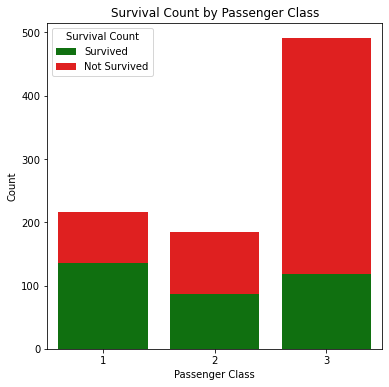

In [16]:
# Group data by 'pclass' and 'alive', and calculate the number of survivors in each class
pclass_survived = titanic.groupby(['pclass', 'alive'])['alive'].count().unstack()

# Create the bar plot
plt.figure(figsize=(6,6))
sns.barplot(x=pclass_survived.index, y=pclass_survived['yes'], label='Survived',color='green')
sns.barplot(x=pclass_survived.index, y=pclass_survived['no'], bottom=pclass_survived['yes'], label='Not Survived',color='red')

# Add labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survival Count by Passenger Class')
plt.legend(title='Survival Count', loc='upper left')

plt.show();

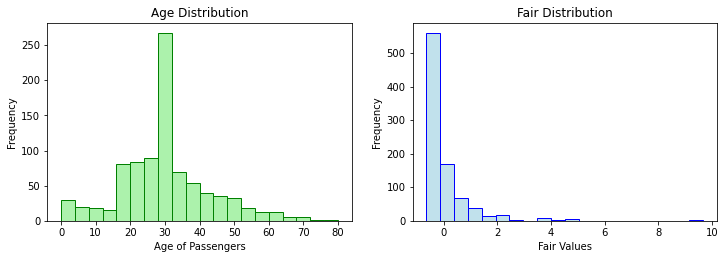

In [17]:
# Create a histogram
plt.rcParams['figure.figsize'] = (12,8)

plt.subplot(2,2,1)
sns.histplot(titanic['age'], bins=20, color ='lightgreen' ,edgecolor='green')
plt.xlabel('Age of Passengers')
plt.ylabel('Frequency')
plt.title('Age Distribution')


plt.subplot(2,2,2)
sns.histplot(titanic['fare'], bins=20, color = 'lightblue' ,edgecolor='blue')
plt.xlabel('Fair Values')
plt.ylabel('Frequency')
plt.title('Fair Distribution')

plt.show();

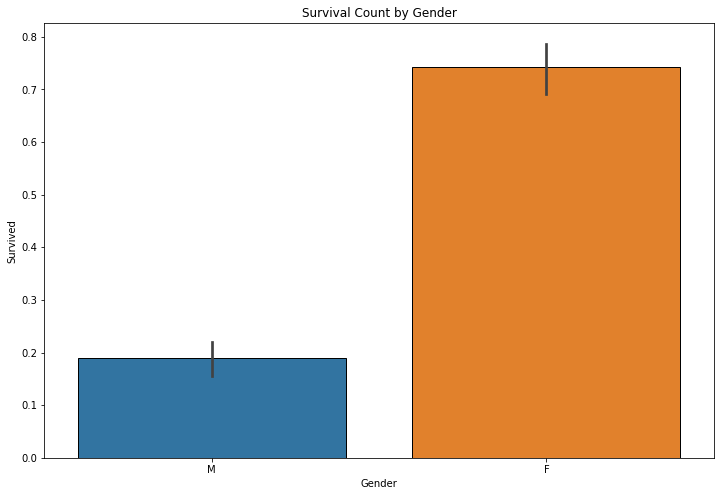

In [18]:
# Create a bar plot
sns.barplot(x='sex', y='survived', data=titanic,edgecolor='black')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Survived')
plt.title('Survival Count by Gender')

# Show the plot
plt.show()
     

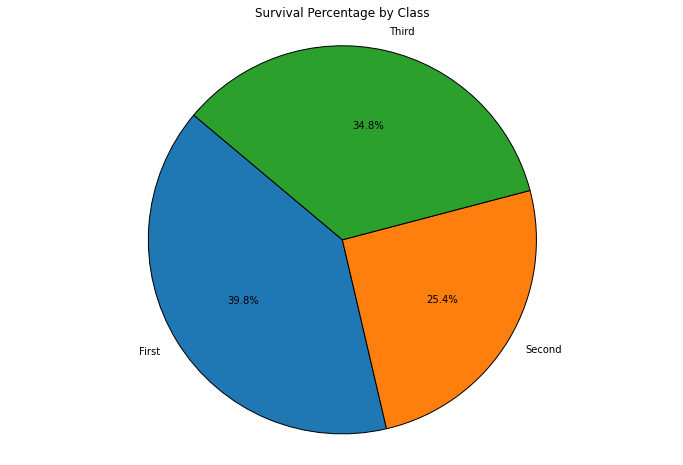

In [19]:
# Calculate survival count for each class
survival_counts = titanic.groupby('class')['survived'].sum()

# Create a pie chart
patches, texts, autotexts = plt.pie(survival_counts, labels=survival_counts.index, autopct='%1.1f%%', startangle=140)

# Set the edge color for each pie slice
for patch in patches:
    patch.set_edgecolor('black')

# Add title
plt.title('Survival Percentage by Class')

# Show the plot
plt.axis('equal')
plt.show()
     

In [20]:
# Calculate survival count for each class
survival_counts = titanic.groupby('survived')['class']
survival_counts.head()
     

0     Third
1     First
2     Third
3     First
4     Third
5     Third
6     First
7     Third
8     Third
9    Second
Name: class, dtype: category
Categories (3, object): ['First', 'Second', 'Third']

In [21]:
titanic['alive'].value_counts()

no     549
yes    342
Name: alive, dtype: int64

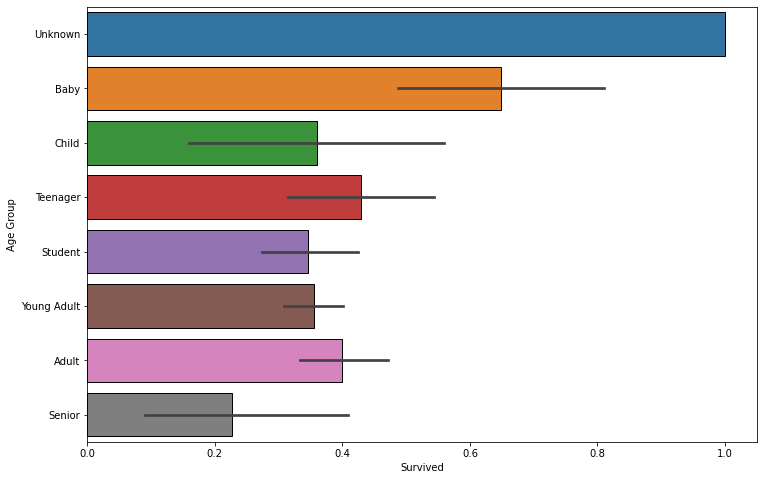

In [22]:
#sort the ages into logical categories
titanic["age"] = titanic["age"].fillna(-0.5)

bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
titanic['agegroup'] = pd.cut(titanic["age"], bins, labels = labels)


#draw a bar plot of Age vs. survival
sns.barplot(y="agegroup", x="survived", data=titanic ,edgecolor = 'black')
plt.ylabel("Age Group")
plt.xlabel("Survived")
plt.show();

In [23]:
titanic['agegroup']


0          Student
1            Adult
2      Young Adult
3      Young Adult
4      Young Adult
          ...     
886    Young Adult
887        Student
888    Young Adult
889    Young Adult
890    Young Adult
Name: agegroup, Length: 891, dtype: category
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior']

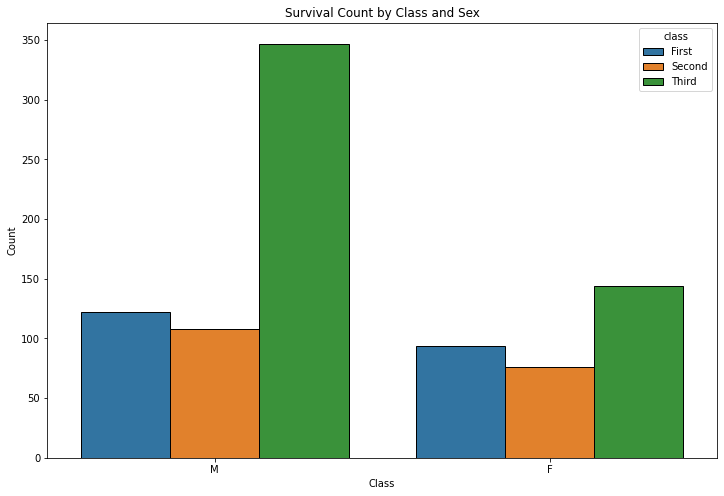

In [24]:
# Calculate survival count for each class
survival_counts = titanic.groupby('sex')['class']

# Create a countplot
sns.countplot(x='sex', hue='class', data=titanic,edgecolor = 'black')

# Add title and labels
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Survival Count by Class and Sex')


plt.show();

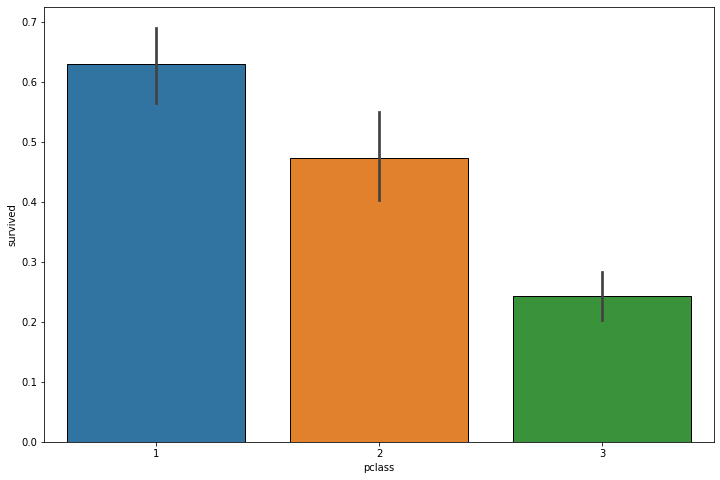

Percentage of People by Pclass that Survived
Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847
------------------------------------------------------------------------------------------------------------------


In [31]:
#draw a bar plot of survival by Pclass
sns.barplot(x="pclass", y="survived", data=titanic, edgecolor = 'black')
plt.show();

#print("-------------------------------------------------")
print("Percentage of People by Pclass that Survived")
#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", titanic["survived"][titanic["pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", titanic["survived"][titanic["pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", titanic["survived"][titanic["pclass"] == 3].value_counts(normalize = True)[1]*100)

print("------------------------------------------------------------------------------------------------------------------")

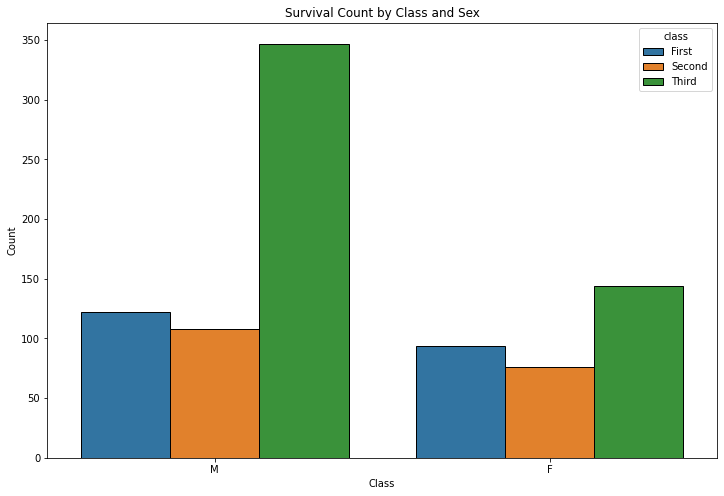

In [33]:
# Calculate survival count for each class
survival_counts = titanic.groupby('sex')['class']

# Create a countplot
sns.countplot(x='sex', hue='class', data=titanic,edgecolor = 'black')

# Add title and labels
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Survival Count by Class and Sex')


plt.show();

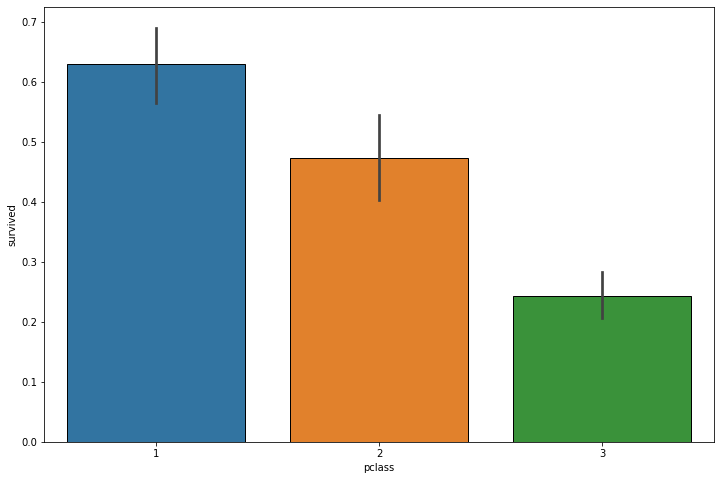

------------------------------------------------------------------------------------------------------------------------
-------------- ------------------Percentage of People by Pclass that Survived-------------------------------------------
Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847
------------------------------------------------------------


In [34]:
#draw a bar plot of survival by Pclass
sns.barplot(x="pclass", y="survived", data=titanic, edgecolor = 'black')
plt.show();

print("------------------------------------------------------------------------------------------------------------------------")
print("-------------- ------------------Percentage of People by Pclass that Survived-------------------------------------------")
#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", titanic["survived"][titanic["pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", titanic["survived"][titanic["pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", titanic["survived"][titanic["pclass"] == 3].value_counts(normalize = True)[1]*100)

print("------------------------------------------------------------")

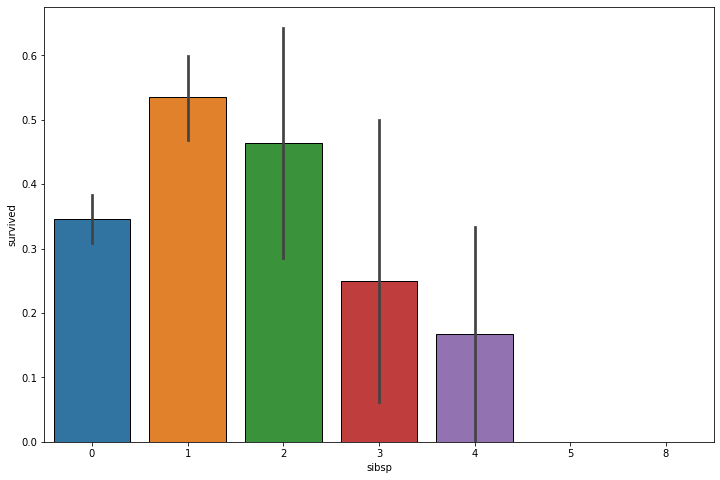

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


In [35]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="sibsp", y="survived", data=titanic,edgecolor = 'black')
plt.show();
#Individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", titanic["survived"][titanic["sibsp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", titanic["survived"][titanic["sibsp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", titanic["survived"][titanic["sibsp"] == 2].value_counts(normalize = True)[1]*100)
     

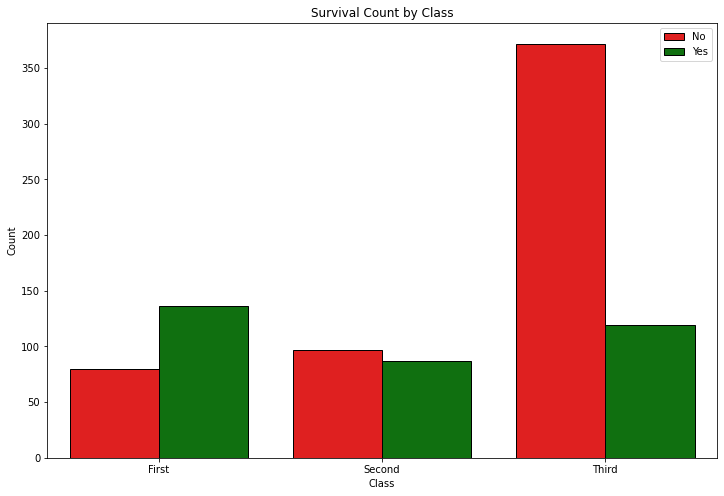

In [36]:
# Calculate survival count for each class
titanic['survived'] = titanic['survived'].replace({0: 'No',1: 'Yes'})
survival_counts = titanic.groupby('sex')['survived']

# Create a countplot
sns.countplot(x='class', hue='survived', data=titanic, palette=['red','green'],edgecolor = 'black')

# Add title and labels
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Survival Count by Class')
plt.legend()

# Show the plot
plt.show();
     


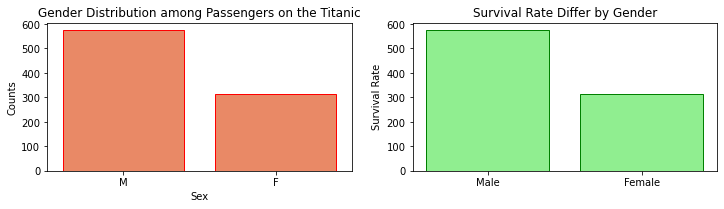

In [37]:
plt.rcParams['figure.figsize'] = (12,6)

#Calculating gender distribution among the passengers on the titanic
plt.subplot(2,2,1)
gender_dist = titanic["sex"].value_counts()
gender_dist

sns.barplot(y = gender_dist.values,x = gender_dist.index,color = 'coral',edgecolor='red')

plt.xlabel("Sex")
plt.ylabel("Counts")
plt.title("Gender Distribution among Passengers on the Titanic")

#survival rate differ by the gender
plt.subplot(2,2,2)
survival_by_gender = titanic.groupby("sex")["survived"]
print(survival_by_gender)

x = len(titanic[titanic.sex=="M"])
y = len(titanic[titanic.sex=="F"])

plt.bar(["Male","Female"],[x,y],color = "lightgreen",edgecolor='green')
plt.ylabel("Survival Rate")

plt.title("Survival Rate Differ by Gender")

plt.show();
     

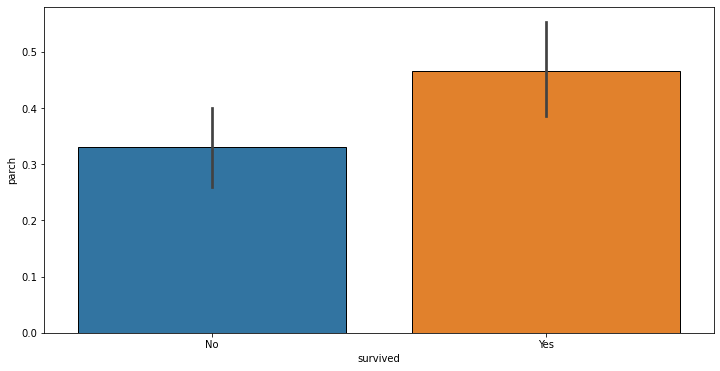

In [39]:
#draw a bar plot for Parch vs. survival
sns.barplot(y="parch", x="survived", data=titanic,edgecolor = 'black')
plt.show();

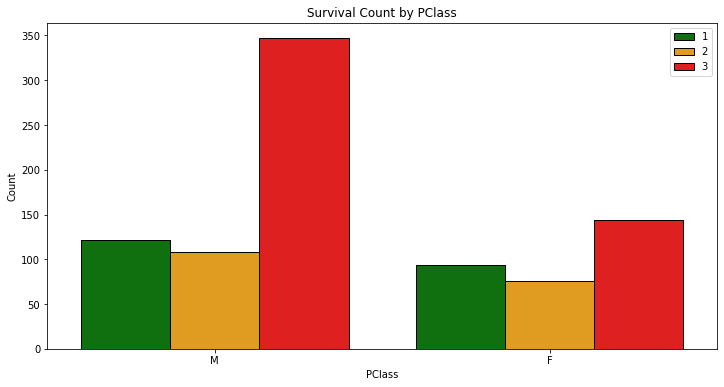

In [40]:
pclass_survival = titanic.groupby('pclass')['sex']

# Create a countplot
sns.countplot(x='sex', hue='pclass', data=titanic, palette=['green','orange','red'],edgecolor = 'black')

# Add title and labels
plt.xlabel('PClass')
plt.ylabel('Count')
plt.title('Survival Count by PClass')
plt.legend()

# Show the plot
plt.show();

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rfc = RandomForestClassifier()

In [43]:
lb = LabelEncoder()

titanic['sex'] = lb.fit_transform(titanic['sex'])
titanic['class'] = lb.fit_transform(titanic['class'])
titanic['alive'] = lb.fit_transform(titanic['alive'])
titanic['alone'] = lb.fit_transform(titanic['alone'])
titanic['embarked'] = lb.fit_transform(titanic['embarked'])
titanic['survived'] = lb.fit_transform(titanic['survived'])
titanic['agegroup'] = lb.fit_transform(titanic['agegroup'])
     
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,agegroup
0,0,3,1,22,1,0,-0.502445,2,2,man,True,Southampton,0,0,4
1,1,1,0,38,1,0,0.786845,0,0,woman,False,Cherbourg,1,0,0
2,1,3,0,26,0,0,-0.488854,2,2,woman,False,Southampton,1,1,7
3,1,1,0,35,1,0,0.420730,2,0,woman,False,Southampton,1,0,7
4,0,3,1,35,0,0,-0.486337,2,2,man,True,Southampton,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,-0.386671,2,1,man,True,Southampton,0,1,7
887,1,1,0,19,0,0,-0.044381,2,0,woman,False,Southampton,1,1,4
888,0,3,0,29,1,2,-0.176263,2,2,woman,False,Southampton,0,0,7
889,1,1,1,26,0,0,-0.044381,0,0,man,True,Cherbourg,1,1,7


In [45]:
X = titanic.drop(columns=['alive','who','adult_male','embark_town','survived','fare'])
y = titanic['survived']


In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)


In [47]:
print("The Shape of X_train :",X_train.shape)
print("The Shape of X_test :",X_test.shape)
print("The Shape of y_train :",y_train.shape)
print("The Shape of y_test :",y_test.shape)

The Shape of X_train : (712, 9)
The Shape of X_test : (179, 9)
The Shape of y_train : (712,)
The Shape of y_test : (179,)


In [48]:
rfc.fit(X_train,y_train)


RandomForestClassifier()

In [49]:
y_pred = rfc.predict(X_test)

In [50]:
# Evaluate the model using metrics like accuracy, precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8156424581005587


In [51]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
     

Precision: 0.8253968253968254


In [52]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.7027027027027027


In [53]:
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

F1-score: 0.7591240875912408


In [54]:
# Access the feature importances from the trained model
feature_importances = rfc.feature_importances_

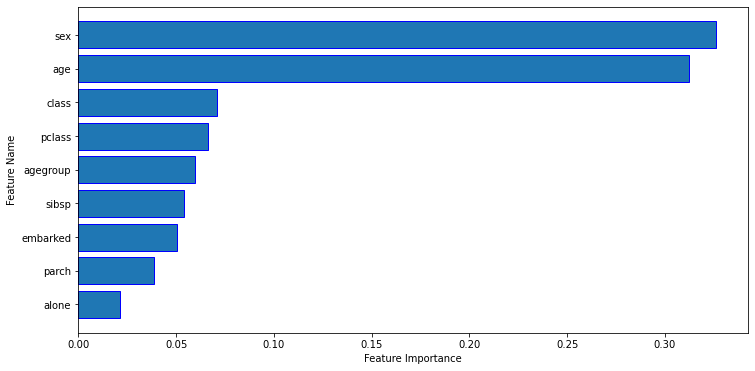

In [55]:
# Sort the feature importances in descending order
sorted_feature_importances = np.sort(feature_importances)
sorted_feature_names = np.array(X_train.columns)[np.argsort(feature_importances)]

# Create a bar plot of the feature importances
plt.barh(sorted_feature_names, sorted_feature_importances,edgecolor = 'blue')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance')
plt.show()